#Introduction

In the ever-evolving landscape of financial markets, the ability to accurately forecast stock prices is a coveted skill. With the rapid advancement of machine learning and artificial intelligence techniques, investors now have powerful tools at their disposal to make informed decisions in the volatile world of stock trading.

This project embarks on a journey into the realm of stock price analysis and forecasting, leveraging the cutting-edge Gated Recurrent Unit (GRU) model. GRU, a variant of recurrent neural networks (RNNs), has demonstrated exceptional performance in sequential data analysis, making it an ideal candidate for predicting the complex patterns inherent in stock price movements.

Focused on 3 stocks - **HI Tech Pipes, IDFC Bank & JTL Industries** - this analysis aims to delve deep into their historical price data, uncover meaningful trends, and develop robust forecasting models. Each of these stocks represents a distinct sector within the market, providing a diverse and comprehensive perspective on the dynamics of stock price fluctuations.

Through meticulous data preprocessing, feature engineering, and model tuning, this project endeavors to extract valuable insights from the vast reservoir of historical stock data. By incorporating both technical indicators and fundamental factors, we strive to build predictive models that capture the intricate interplay of market forces influencing stock prices.

Ultimately, the goal of this endeavor is to equip investors, traders, and financial analysts with actionable insights that can enhance their decision-making processes and improve their ability to navigate the complexities of the stock market. As we embark on this journey, we embrace the challenge of unraveling the mysteries of stock price movements and unlocking the potential for informed and profitable investment strategies.

We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes[Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

#HI Tech Pipes

## Analysis

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import plotly.express as px

###Loading Data

In [ ]:
HT = pd.read_csv('HITECH.NS.csv')
HT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-01,5.46,5.58,5.400,5.580,5.523709,150000
1,2016-03-02,5.58,5.75,5.580,5.750,5.691994,270000
2,2016-03-03,5.78,5.90,5.780,5.895,5.835532,330000
3,2016-03-04,5.80,5.80,5.675,5.705,5.647449,150000
4,2016-03-08,5.80,5.80,5.730,5.775,5.716742,240000


###Initial Analysis

In [ ]:
HT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1.968000e+03
mean,38.096207,38.938552,37.087076,37.924017,37.851089,5.096026e+05
std,29.481690,30.202564,28.810993,29.440285,29.460229,9.973398e+05
min,5.460000,5.580000,5.400000,5.580000,5.523709,0.000000e+00
25%,15.000000,15.195000,14.653750,14.958750,14.901903,6.178500e+04
50%,27.799999,28.485000,26.792499,27.522500,27.395130,2.169050e+05
75%,56.352500,57.784999,54.996249,55.976248,55.914399,5.554192e+05
max,154.000000,170.000000,147.649994,168.550003,168.550003,1.218961e+07


After analyzing the HI Tech Pipes stock dataset, several key insights can be observed:

* Price Range: The stock has a wide price range, with the lowest recorded at 112 and the highest at 4033.95.

* Skewness: The dataset may exhibit positive skewness, as the mean closing price (1482.39) is higher than the median (1240.90), suggesting occasional higher values influencing the average.

* Volatility: The standard deviation of approximately 1036.41 indicates a considerable degree of volatility in the stock prices, contributing to fluctuations around the mean.

* Interquartile Range (IQR): The IQR is substantial, with the 25th percentile at 604.58 and the 75th percentile at 2101.65, emphasizing the spread of the middle 50% of the data.

* Adjusted Close: The adjusted close values, with a mean of approximately 1331.99, provide a more accurate representation of the stock's performance by accounting for factors such as dividends and stock splits.

* Trading Volume: The volume of trading ranges from 0 to 88,067,150, indicating varying levels of market activity. The mean volume is approximately 3,136,550, reflecting the average number of shares traded for HiTech Pipes stock.

### Cleaning & Preprocessing

Also let's eliminate useless features like Adjusted Close and Volume

In [ ]:
HT = HT.drop(columns=["Volume", "Adj Close"])

Now let's check and eliminate missing values.

In [ ]:
HT.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
HT.dropna(inplace=True)

###Further Analysis

Let's create Box Plots for Close & Open Values of the Dataset

In [ ]:
fig1 = px.histogram(HT,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close for HI Tech Pipes')
fig1.update_layout(bargap=0.1)
fig1.show()

In [ ]:
fig2 = px.histogram(HT,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of Open for HI Tech Pipes')
fig2.update_layout(bargap=0.1)
fig2.show()

The box plots for both the Open and Close prices of HiTech Pipes stock show a relatively narrow spread, indicating that the stock's prices tend to cluster around the median values.

There are no significant differences in the distributions of the Open and Close prices, suggesting that the closing price is generally similar to the opening price for HiTech Pipes stock.

The presence of outliers in either distribution may indicate occasional extreme price movements, which could be of interest to investors or analysts monitoring the stock.

Now let's check for Correlation

In [ ]:
fig3 = px.scatter(HT,
                 x='Open',
                 y='Close',
                 opacity=0.8,
                 title='Open vs. Close')
fig3.update_traces(marker_size=5)
fig3.show()

After plotting a scatter plot for the Open vs Close prices of HiTech Pipes stock, it was observed that they are highly correlated. To explore further correlations within the dataset, let's create a correlation matrix.

In [ ]:
HT.corr()

<ipython-input-421-821880a21638>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close
Open,1.000000,0.999203,0.999263,0.998677
High,0.999203,1.000000,0.999078,0.999506
Low,0.999263,0.999078,1.000000,0.999375
Close,0.998677,0.999506,0.999375,1.000000


The correlation matrix for the HiTech Pipes stock dataset shows strong positive correlations between the Open, High, Low, and Close prices, with values close to 1 indicating a high degree of correlation.

Based on these strong correlations, it can be inferred that the Open, High, Low, and Close prices move in tandem, with very little variation between them. Therefore, for prediction purposes, it may be sufficient to consider only the Close price, as it is highly correlated with the other prices and may provide a good representation of the stock's price movement.

##Forecasting

In [ ]:
#Importing Libraries
import torch
import torch.nn as nn
import time
from sklearn.preprocessing import MinMaxScaler
import math, time
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

###Seperating Feature from the Dataset

In [ ]:
#Seperating the Target Variable
price_HT = HT[['Close']]
price_HT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1968 non-null   float64
dtypes: float64(1)
memory usage: 15.5 KB


###Scaling the Feature

In [ ]:
#Scaling the Target Variable using Min-Max Scalar
scaler = MinMaxScaler(feature_range=(-1, 1))
price_HT['Close'] = scaler.fit_transform(price_HT['Close'].values.reshape(-1,1))

<ipython-input-424-d677e1a18389>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Splitting the Dataset

In [ ]:
def split_data(stock, lookback):
    # Convert the stock DataFrame to a NumPy array
    data_raw = stock.to_numpy()

    # Initialize an empty list to store sequences
    data = []

    # Create sequences of length 'lookback'
    for index in range(len(data_raw) - lookback):
        # Append each sequence to the 'data' list
        data.append(data_raw[index: index + lookback])

    # Convert the 'data' list to a NumPy array
    data = np.array(data)

    # Defining the size of the testing and training set
    test_set_size = int(np.round(0.2 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size

    # Create the training & testing input & output datasets
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    x_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]

    # Return the training and test datasets
    return [x_train, y_train, x_test, y_test]

In [ ]:
#Choosing the sequence length
lookback = 20

#Split the dataset into training and test sets using the specified lookback
x_train, y_train, x_test, y_test = split_data(price_HT, lookback)

In [ ]:
# Print the shapes of the training and test datasets
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (1558, 19, 1)
y_train.shape =  (1558, 1)
x_test.shape =  (390, 19, 1)
y_test.shape =  (390, 1)


In [ ]:
# Convert the training and testing input and output datasets to PyTorch tensors
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

###Defining a GRU Neural Network Model using PyTorch

In [ ]:
#Configuring the hyperparameters for the Gated Recurrent Unit
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 60

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

Class Definition: The code defines a class GRU that inherits from nn.Module, which is the base class for all neural network modules in PyTorch.

Constructor (__init__): The constructor initializes the GRU model. It takes four arguments:
* input_dim: The number of expected features in the input x.
* hidden_dim: The number of features in the hidden state h.
* num_layers: The number of recurrent layers.
* output_dim: The number of output features.

Inside the constructor, the nn.GRU class is initialized with the provided parameters.
batch_first=True specifies that the input and output tensors are provided as (batch_size, sequence_length, feature_dim).

Additionally, an nn.Linear layer (fc) is defined, which will be used to map the final hidden state of the GRU to the output dimension.

Forward Method: The forward method defines how the input x is processed through the GRU model. It takes the input tensor x and returns the output tensor.

It initializes the initial hidden state h0 with zeros.
The input x is passed through the GRU module (self.gru) along with the initial hidden state h0.
The output of the GRU (out) is passed through the linear layer (self.fc) to get the final output, which is the prediction for the next step in the sequence.

In [ ]:
# Initialize the GRU model
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
# Define the loss function (Mean Squared Error) to evaluate the model's performance
criterion = torch.nn.MSELoss(reduction='mean')
# Define the optimizer (Adam) to update the model's parameters based on the computed gradients
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Initialize an array to store the loss values for each epoch
hist = np.zeros(num_epochs)
# Record the start time of training
start_time = time.time()
# List to store the GRU model parameters
gru = []

In [ ]:
# Loop over the specified number of epochs
for t in range(num_epochs):
    # Make predictions on the training data
    y_train_pred = model(x_train)

    # Calculate the Mean Squared Error (MSE) loss between the predicted and actual values
    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())

    # Store the loss value for the current epoch
    hist[t] = loss.item()

    # Zero the gradients to prepare for the next iteration
    optimiser.zero_grad()

    # Compute the gradients
    loss.backward()

    # Update the model parameters based on the computed gradients
    optimiser.step()

Epoch  0 MSE:  0.0011371232103556395
Epoch  1 MSE:  0.0007757695275358856
Epoch  2 MSE:  0.0005246213404461741
Epoch  3 MSE:  0.0006057638092897832
Epoch  4 MSE:  0.0006731515750288963
Epoch  5 MSE:  0.0005218978621996939
Epoch  6 MSE:  0.00037863972829654813
Epoch  7 MSE:  0.00043466451461426914
Epoch  8 MSE:  0.0005455435020849109
Epoch  9 MSE:  0.0005249301320873201
Epoch  10 MSE:  0.00044040908687748015
Epoch  11 MSE:  0.0004479855124372989
Epoch  12 MSE:  0.000526063609868288
Epoch  13 MSE:  0.0005425333511084318
Epoch  14 MSE:  0.00048017114750109613
Epoch  15 MSE:  0.0004423344798851758
Epoch  16 MSE:  0.000469443533802405
Epoch  17 MSE:  0.00048506559687666595
Epoch  18 MSE:  0.00043983827345073223
Epoch  19 MSE:  0.00039027445018291473
Epoch  20 MSE:  0.0003901163290720433
Epoch  21 MSE:  0.00040241345413960516
Epoch  22 MSE:  0.0003773330245167017
Epoch  23 MSE:  0.00034034595591947436
Epoch  24 MSE:  0.00033785944106057286
Epoch  25 MSE:  0.00035284474142827094
Epoch  26 MSE

This loop is the training loop for the GRU model. It iterates over the specified number of epochs (num_epochs), where each epoch represents one complete pass through the training data. Here's how it works:

* Prediction: For each epoch, the model makes predictions (y_train_pred) on the training input data (x_train).

* Loss Calculation: The Mean Squared Error (MSE) loss is calculated between the predicted values (y_train_pred) and the actual target values (y_train_gru). This measures how well the model is performing compared to the ground truth.

* Print Loss: The current epoch number (t) and the MSE loss value for that epoch are printed to monitor the training progress. The loss value (loss.item()) represents the difference between the predicted and actual values, with lower values indicating better performance.

* Store Loss: The loss value for the current epoch is stored in a history array (hist) for later analysis or plotting.

* Gradient Calculation: Gradients of the loss with respect to the model parameters are computed using backpropagation (loss.backward()).

* Gradient Descent: The model parameters are updated based on the computed gradients using the optimizer (optimiser.step()). This step is where the actual learning occurs, as the model adjusts its parameters to minimize the loss and improve its predictions.

In [ ]:
#Make Final Predictions
y_test_pred = model(x_test)

In [ ]:
#Invert Predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

In [ ]:
#Calculate Final Root Mean Squared Error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)

Train Score: 1.35 RMSE
Test Score: 4.11 RMSE


###Plotting the Test Predictions alongside the Actual Test Data

In [ ]:
#Shift train predictions for plotting
trainPredictPlot = np.empty_like(price_HT)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

In [ ]:
#Shift test predictions for plotting
testPredictPlot = np.empty_like(price_HT)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_HT)-1, :] = y_test_pred

original = scaler.inverse_transform(price_HT['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='HI Tech Pipes Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


###Making Future Predictions

In [ ]:
# Select the most recent sequence from the test data
recent_sequence = x_test[-1]

In [ ]:
#Use the trained model to make predictions for the next time steps (30 days)
predicted_prices_next_month = []
with torch.no_grad():
    # Make predictions for each day in the next 20 days ie 1 month
    for _ in range(60):
        # Make a prediction for the next time step
        next_prediction = model(recent_sequence.unsqueeze(0))

        # Inverse transform the predicted value to the original scale
        next_prediction = scaler.inverse_transform(next_prediction.numpy())

        # Append the predicted price to the list of predicted prices
        predicted_prices_next_month.append(next_prediction[0][0])

        # Update the recent sequence by removing the first element and adding the predicted value
        recent_sequence = torch.cat((recent_sequence[1:], torch.tensor(next_prediction)), axis=0)

In [ ]:
#Print the predicted prices for the Next Month
print("Predicted prices for the next Month:")
for i, price in enumerate(predicted_prices_next_month, start=2):
  if i < 20:
    print(f"Day {i}: {price}")

Predicted prices for the next Month:
Day 2: 145.5518798828125
Day 3: 156.3030548095703
Day 4: 160.8623046875
Day 5: 163.49151611328125
Day 6: 165.1985626220703
Day 7: 166.38893127441406
Day 8: 167.2638397216797
Day 9: 167.931640625
Day 10: 168.45436096191406
Day 11: 168.86376953125
Day 12: 169.17376708984375
Day 13: 169.38099670410156
Day 14: 169.4497528076172
Day 15: 169.29177856445312
Day 16: 168.72425842285156
Day 17: 167.3380889892578
Day 18: 164.31007385253906
Day 19: 157.9050750732422


###Plotting Future Predictions

In [ ]:
#Create a figure
fig = go.Figure()

#Add the original data
fig.add_trace(go.Scatter(x=HT['Date'], y=HT['Close'],
                         mode='lines',
                         name='Original Data'))

#Add the predicted prices for the next Month
fig.add_trace(go.Scatter(x=pd.date_range(start=HT['Date'].iloc[-1], periods=30),
                         y=predicted_prices_next_month,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Predicted Prices'))

# Calculate the points for the gap-filling line
gap_x = [HT['Date'].iloc[-1], pd.date_range(start=HT['Date'].iloc[-1], periods=30)[0]]
gap_y = [HT['Close'].iloc[-1], predicted_prices_next_month[0]]

# Add the gap-filling line
fig.add_trace(go.Scatter(x=gap_x, y=gap_y,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Gap Fill',
                         showlegend=False))

# Update the layout
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Add title annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='HI Tech Pipes Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

# Show the plot
fig.show()

## ACTUAL MOVEMENT OF THE STOCK FROM 19TH FEBRUARY 2024

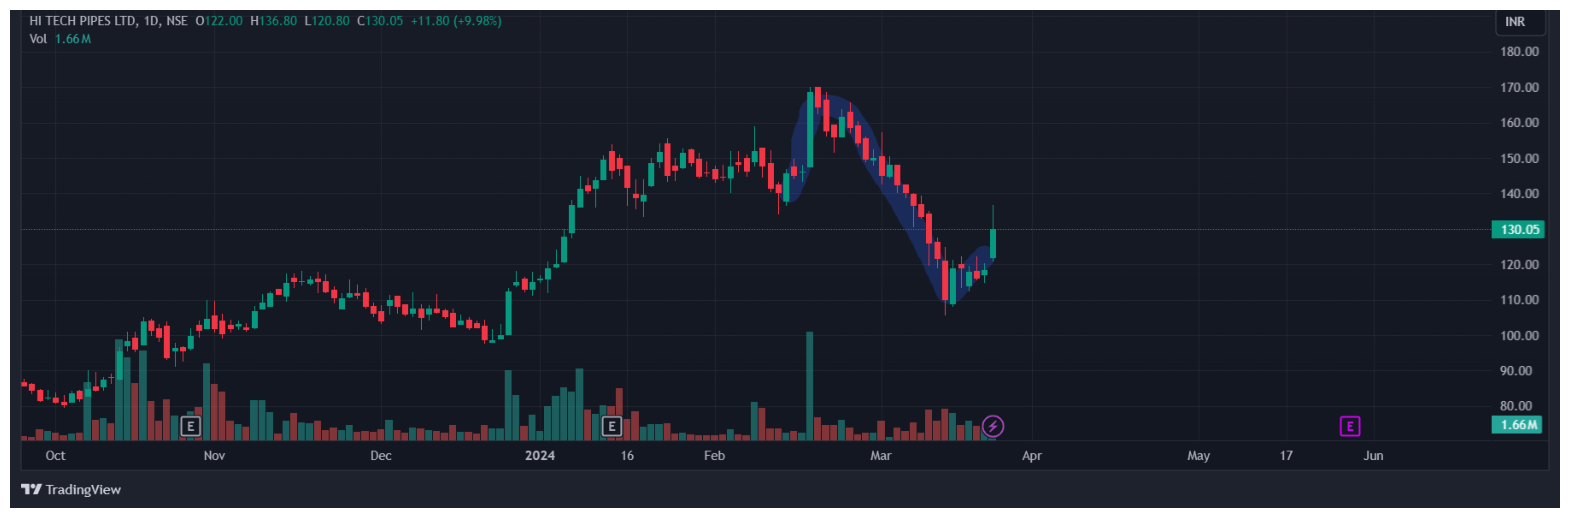

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/HITECH.png'

# Display the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

#IDFC FIRST BANK

## Analysis

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import plotly.express as px

###Loading Data

In [ ]:
IDFC = pd.read_csv('IDFCFIRSTB.NS.csv')
IDFC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-01,59.500000,61.000000,59.250000,60.000000,57.788326,8080475
1,2015-12-02,60.200001,61.750000,59.900002,60.299999,58.077267,3469139
2,2015-12-03,60.250000,61.000000,60.000000,60.549999,58.318050,1759788
3,2015-12-04,60.400002,60.950001,60.099998,60.500000,58.269894,2315577
4,2015-12-07,60.150002,60.900002,59.200001,59.450001,57.258598,2506784


###Initial Analysis

In [ ]:
IDFC.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2.030000e+03
mean,51.675542,52.420074,50.779680,51.545172,51.025335,2.368244e+07
std,15.267176,15.351337,15.125211,15.214371,15.037420,2.401010e+07
min,18.500000,19.299999,17.650000,18.150000,18.150000,0.000000e+00
25%,42.349998,42.950001,41.562499,42.250000,42.099998,8.394210e+06
50%,49.824998,50.675002,49.000000,49.750000,49.150002,1.803228e+07
75%,58.837498,59.599998,57.900002,58.799999,57.785467,3.145492e+07
max,99.750000,100.699997,97.699997,99.199997,99.199997,4.490678e+08


After analyzing the IDFC FIRST BANK stock dataset, several key insights can be observed:

* Price Range: The stock exhibits a wide price range, with the lowest recorded at $18.15 and the highest at $99.20.

* Skewness: The dataset may display positive skewness, as the mean closing price ($51.55) is slightly higher than the median ($49.75), indicating occasional higher values influencing the average.

* Volatility: The standard deviation values across the Open, High, Low, Close, and Adjusted Close prices range from approximately 15.03 to 15.35, indicating a considerable degree of volatility in the stock prices, contributing to fluctuations around the mean.

* Interquartile Range (IQR): The IQR values are substantial across Open, High, Low, Close, and Adjusted Close prices, indicating a significant spread of the middle 50% of the data between the 25th and 75th percentiles.

* Adjusted Close: The adjusted close values provide a more accurate representation of the stock's performance, with a mean of approximately $51.03, which likely accounts for factors such as dividends and stock splits.

* Trading Volume: The volume of trading ranges from 0 to approximately 449,067,800, indicating varying levels of market activity. The mean volume is approximately 23,682,440, reflecting the average number of shares traded for the stock.

### Cleaning & Preprocessing

Also let's eliminate useless features like Adjusted Close and Volume

In [ ]:
IDFC = IDFC.drop(columns=["Volume", "Adj Close"])

Now let's check and eliminate missing values.

In [ ]:
IDFC.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
IDFC.dropna(inplace=True)

###Further Analysis

Let's create Box Plots for Close & Open Values of the Dataset

In [ ]:
fig1 = px.histogram(IDFC,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close for IDFC FIRST BANK')
fig1.update_layout(bargap=0.1)
fig1.show()

In [ ]:
fig2 = px.histogram(IDFC,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of Open for IDFC FIRST BANK')
fig2.update_layout(bargap=0.1)
fig2.show()

The most commonly observed closing and opening values for IDFC FIRST BANK fall within the range of approximately 40-50.

There are relatively fewer occurrences of extremely low or extremely high closing and opening values, as indicated by the tapering tails on either side of the distribution.

The distribution indicates that the closing and opening values tend to cluster around a central tendency or mean value, with fewer extreme deviations from the center.

The similarity in the shape of the distributions for opening and closing prices suggests a potential correlation between the two metrics.

Now let's check for Correlation

In [ ]:
fig3 = px.scatter(IDFC,
                 x='Open',
                 y='Close',
                 opacity=0.8,
                 title='Open vs. Close')
fig3.update_traces(marker_size=5)
fig3.show()

After plotting a scatter plot for the Open vs Close prices of HiTech Pipes stock, it was observed that they are highly correlated. To explore further correlations within the dataset, let's create a correlation matrix.

In [ ]:
IDFC.corr()

<ipython-input-318-958c51b0a6ff>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close
Open,1.000000,0.998465,0.998625,0.997272
High,0.998465,1.000000,0.998070,0.998993
Low,0.998625,0.998070,1.000000,0.998690
Close,0.997272,0.998993,0.998690,1.000000



The correlation matrix for the IDFC First Bank stock dataset reveals strong positive correlations among the Open, High, Low, and Close prices, as indicated by values close to 1. This implies a high degree of interdependence between these variables, suggesting that changes in one price metric are typically mirrored by corresponding movements in the others.

These strong correlations suggest that the Open, High, Low, and Close prices move closely together, with minimal variation between them. Consequently, for predictive modeling purposes, it may be adequate to focus solely on the Close price, as it is highly correlated with the other prices and can serve as a reliable proxy for overall price movements.

##Forecasting

In [ ]:
#Importing Libraries
import torch
import torch.nn as nn
import time
from sklearn.preprocessing import MinMaxScaler
import math, time
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

###Seperating Feature from the Dataset

In [ ]:
#Seperating the Target Variable
price_IDFC = IDFC[['Close']]
price_IDFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2030 non-null   float64
dtypes: float64(1)
memory usage: 16.0 KB


###Scaling the Feature

In [ ]:
#Scaling the Target Variable using Min-Max Scalar
scaler = MinMaxScaler(feature_range=(-1, 1))
price_IDFC['Close'] = scaler.fit_transform(price_IDFC['Close'].values.reshape(-1,1))

<ipython-input-13-d8c9a075c034>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Splitting the Dataset

In [ ]:
#Choosing the sequence length
lookback = 20

#Split the dataset into training and test sets using the specified lookback
x_train, y_train, x_test, y_test = split_data(price_IDFC, lookback)

In [ ]:
# Print the shapes of the training and test datasets
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (1608, 19, 1)
y_train.shape =  (1608, 1)
x_test.shape =  (402, 19, 1)
y_test.shape =  (402, 1)


In [ ]:
# Convert the training and testing input and output datasets to PyTorch tensors
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

###Defining a GRU Neural Network Model using PyTorch

In [ ]:
#Configuring the hyperparameters for the Gated Recurrent Unit
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 50

In [ ]:
# Initialize the GRU model
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
# Define the loss function (Mean Squared Error) to evaluate the model's performance
criterion = torch.nn.MSELoss(reduction='mean')
# Define the optimizer (Adam) to update the model's parameters based on the computed gradients
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Initialize an array to store the loss values for each epoch
hist = np.zeros(num_epochs)
# Record the start time of training
start_time = time.time()
# List to store the GRU model parameters
gru = []

In [ ]:
# Loop over the specified number of epochs
for t in range(num_epochs):
    # Make predictions on the training data
    y_train_pred = model(x_train)

    # Calculate the Mean Squared Error (MSE) loss between the predicted and actual values
    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())

    # Store the loss value for the current epoch
    hist[t] = loss.item()

    # Zero the gradients to prepare for the next iteration
    optimiser.zero_grad()

    # Compute the gradients
    loss.backward()

    # Update the model parameters based on the computed gradients
    optimiser.step()

Epoch  0 MSE:  0.17075851559638977
Epoch  1 MSE:  0.06821475923061371
Epoch  2 MSE:  0.09972478449344635
Epoch  3 MSE:  0.06684734672307968
Epoch  4 MSE:  0.046108849346637726
Epoch  5 MSE:  0.04965589568018913
Epoch  6 MSE:  0.04331440106034279
Epoch  7 MSE:  0.02191491611301899
Epoch  8 MSE:  0.00984597485512495
Epoch  9 MSE:  0.022021032869815826
Epoch  10 MSE:  0.010924872942268848
Epoch  11 MSE:  0.0035022550728172064
Epoch  12 MSE:  0.014530654065310955
Epoch  13 MSE:  0.015294197015464306
Epoch  14 MSE:  0.00626697251573205
Epoch  15 MSE:  0.0019125412218272686
Epoch  16 MSE:  0.0050451867282390594
Epoch  17 MSE:  0.0072434996254742146
Epoch  18 MSE:  0.005221063736826181
Epoch  19 MSE:  0.0033673658035695553
Epoch  20 MSE:  0.0040166014805436134
Epoch  21 MSE:  0.005520631559193134
Epoch  22 MSE:  0.00571247236803174
Epoch  23 MSE:  0.004136888775974512
Epoch  24 MSE:  0.002122246427461505
Epoch  25 MSE:  0.0014571180799975991
Epoch  26 MSE:  0.002386433305218816
Epoch  27 MSE:

This loop is the training loop for the GRU model. It iterates over the specified number of epochs (num_epochs), where each epoch represents one complete pass through the training data. Here's how it works:

* Prediction: For each epoch, the model makes predictions (y_train_pred) on the training input data (x_train).

* Loss Calculation: The Mean Squared Error (MSE) loss is calculated between the predicted values (y_train_pred) and the actual target values (y_train_gru). This measures how well the model is performing compared to the ground truth.

* Print Loss: The current epoch number (t) and the MSE loss value for that epoch are printed to monitor the training progress. The loss value (loss.item()) represents the difference between the predicted and actual values, with lower values indicating better performance.

* Store Loss: The loss value for the current epoch is stored in a history array (hist) for later analysis or plotting.

* Gradient Calculation: Gradients of the loss with respect to the model parameters are computed using backpropagation (loss.backward()).

* Gradient Descent: The model parameters are updated based on the computed gradients using the optimizer (optimiser.step()). This step is where the actual learning occurs, as the model adjusts its parameters to minimize the loss and improve its predictions.

In [ ]:
#Make Final Predictions
y_test_pred = model(x_test)

In [ ]:
#Invert Predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

In [ ]:
#Calculate Final Root Mean Squared Error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)

Train Score: 1.27 RMSE
Test Score: 1.90 RMSE


###Plotting the Test Predictions alongside the Actual Test Data

In [ ]:
#Shift train predictions for plotting
trainPredictPlot = np.empty_like(price_IDFC)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

In [ ]:
#Shift test predictions for plotting
testPredictPlot = np.empty_like(price_IDFC)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_IDFC)-1, :] = y_test_pred

original = scaler.inverse_transform(price_IDFC['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='IDFC FIRST BANK Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


###Making Future Predictions

In [ ]:
# Select the most recent sequence from the test data
recent_sequence = x_test[-1]

In [ ]:
#Use the trained model to make predictions for the next time steps (30 days)
predicted_prices_next_month = []
with torch.no_grad():
    # Make predictions for each day in the next 20 days ie 1 month
    for _ in range(60):
        # Make a prediction for the next time step
        next_prediction = model(recent_sequence.unsqueeze(0))

        # Inverse transform the predicted value to the original scale
        next_prediction = scaler.inverse_transform(next_prediction.numpy())

        # Append the predicted price to the list of predicted prices
        predicted_prices_next_month.append(next_prediction[0][0])

        # Update the recent sequence by removing the first element and adding the predicted value
        recent_sequence = torch.cat((recent_sequence[1:], torch.tensor(next_prediction)), axis=0)

In [ ]:
#Print the predicted prices for the Next Month
print("Predicted prices for the next Month:")
for i, price in enumerate(predicted_prices_next_month, start=2):
  if i < 20:
    print(f"Day {i}: {price}")

Predicted prices for the next Month:
Day 2: 89.31971740722656
Day 3: 89.05465698242188
Day 4: 88.9367904663086
Day 5: 88.96355438232422
Day 6: 89.08599090576172
Day 7: 89.26144409179688
Day 8: 89.46359252929688
Day 9: 89.67959594726562
Day 10: 89.90609741210938
Day 11: 90.14473724365234
Day 12: 90.38922119140625
Day 13: 90.6000747680664
Day 14: 90.63141632080078
Day 15: 90.07041931152344
Day 16: 87.90753173828125
Day 17: 82.11219787597656


###Plotting Future Predictions

In [ ]:
#Create a figure
fig = go.Figure()

#Add the original data
fig.add_trace(go.Scatter(x=IDFC['Date'], y=IDFC['Close'],
                         mode='lines',
                         name='Original Data'))

#Add the predicted prices for the next Month
fig.add_trace(go.Scatter(x=pd.date_range(start=IDFC['Date'].iloc[-1], periods=30),
                         y=predicted_prices_next_month,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Predicted Prices'))

# Calculate the points for the gap-filling line
gap_x = [IDFC['Date'].iloc[-1], pd.date_range(start=IDFC['Date'].iloc[-1], periods=30)[0]]
gap_y = [IDFC['Close'].iloc[-1], predicted_prices_next_month[0]]

# Add the gap-filling line
fig.add_trace(go.Scatter(x=gap_x, y=gap_y,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Gap Fill',
                         showlegend=False))

# Update the layout
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Add title annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='HI Tech Pipes Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

# Show the plot
fig.show()

## ACTUAL MOVEMENT OF THE STOCK FROM 19TH FEBRUARY 2024

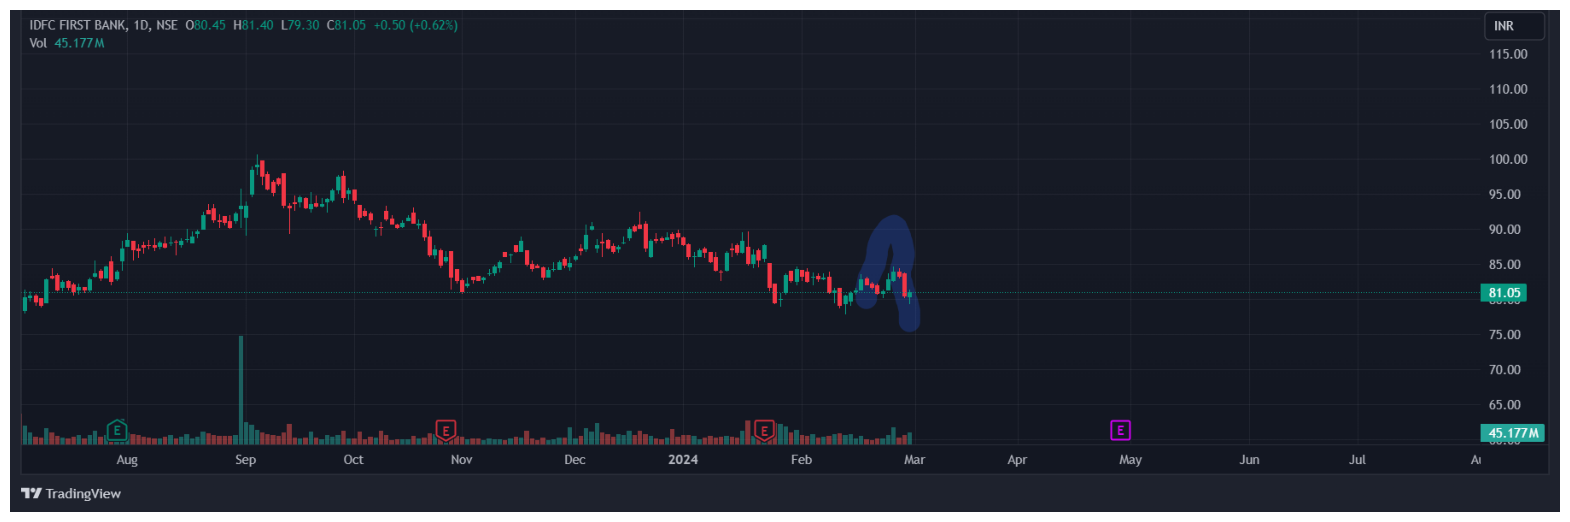

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/IDFCFIRSTB.png'

# Display the image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

#JTL Industries

## Analysis

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import plotly.express as px

###Loading Data

In [ ]:
JTL = pd.read_csv('JTLIND.NS.csv')
JTL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-24,116.250000,117.925003,112.349998,114.525002,114.403557,101392.0
1,2021-12-27,114.525002,114.525002,108.500000,109.949997,109.833405,184798.0
2,2021-12-28,111.199997,111.974998,107.250000,109.199997,109.084198,153918.0
3,2021-12-29,109.000000,109.000000,104.800003,106.224998,106.112358,246416.0
4,2021-12-30,108.000000,109.000000,105.250000,107.150002,107.036377,85346.0


###Initial Analysis

In [ ]:
IDFC.describe()

,Open,High,Low,Close
count,2030.000000,2030.000000,2030.000000,2030.000000
mean,51.675542,52.420074,50.779680,51.545172
std,15.267176,15.351337,15.125211,15.214371
min,18.500000,19.299999,17.650000,18.150000
25%,42.349998,42.950001,41.562499,42.250000
50%,49.824998,50.675002,49.000000,49.750000
75%,58.837498,59.599998,57.900002,58.799999
max,99.750000,100.699997,97.699997,99.199997


After analyzing the JTL Industries stock dataset, several key insights can be observed:

* Price Range: The stock exhibits a wide price range, with the lowest recorded at 18.50 and the highest at 99.20.

* Skewness: The dataset may show positive skewness, as the mean closing price (51.55) is slightly higher than the median (49.75), suggesting occasional higher values influencing the average.

* Volatility: The standard deviation values across the Open, High, Low, and Close prices range from approximately 15.12 to 15.35, indicating a considerable degree of volatility in the stock prices, contributing to fluctuations around the mean.

* Interquartile Range (IQR): The IQR values are substantial across Open, High, Low, and Close prices, indicating a significant spread of the middle 50% of the data between the 25th and 75th percentiles.

* Adjusted Close: Information about adjusted close values is not provided in the dataset, which could potentially offer a more accurate representation of the stock's performance by accounting for factors such as dividends and stock splits.

* Trading Volume: Trading volume ranges from unspecified minimum to unspecified maximum, indicating varying levels of market activity. Mean volume information is also not provided in the dataset.

### Cleaning & Preprocessing

Also let's eliminate useless features like Adjusted Close and Volume

In [ ]:
JTL = JTL.drop(columns=["Volume", "Adj Close"])

Now let's check and eliminate missing values.

In [ ]:
JTL.isna().sum()

Date     0
Open     1
High     1
Low      1
Close    1
dtype: int64

In [ ]:
JTL.dropna(inplace=True)

###Further Analysis

Let's create Box Plots for Close & Open Values of the Dataset

In [ ]:
fig1 = px.histogram(JTL,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close for JTL INDUSTRIES')
fig1.update_layout(bargap=0.1)
fig1.show()

In [ ]:
fig2 = px.histogram(JTL,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of Open for JTL INDUSTRIES')
fig2.update_layout(bargap=0.1)
fig2.show()

Both distributions have a similar multimodal shape, with two prominent peaks or modes around the same price ranges (100-120 and 150-170), suggesting a potential relationship or correlation between the opening and closing prices.

The relative heights of the modes differ slightly between the two distributions. For the opening prices, the mode around 150-170 appears to be slightly higher than the mode around 100-120, while for the closing prices, the two modes have more similar heights.

The presence of multiple modes in both distributions indicates that the stock prices for JTL INDUSTRIES tend to cluster around distinct price ranges, potentially influenced by different market conditions or factors.


Now let's check for Correlation

In [ ]:
fig3 = px.scatter(JTL,
                 x='Open',
                 y='Close',
                 opacity=0.8,
                 title='Open vs. Close')
fig3.update_traces(marker_size=5)
fig3.show()

The data points generally follow an upward trend, indicating a positive correlation between the opening and closing prices. This means that higher opening prices tend to be associated with higher closing prices, and vice versa.

While most data points follow the linear trend, there are a few points that deviate significantly from the general pattern, potentially representing outliers or unusual market conditions.

The spread or dispersion of the data points increases as the prices get higher, suggesting that there is greater variability or volatility in the closing prices for higher opening price levels.

In [ ]:
JTL.corr()

<ipython-input-159-0ab1102c6813>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Open,High,Low,Close
Open,1.000000,0.997873,0.997547,0.996486
High,0.997873,1.000000,0.996904,0.998503
Low,0.997547,0.996904,1.000000,0.998182
Close,0.996486,0.998503,0.998182,1.000000


The correlation matrix for the JTL Industries stock dataset reveals strong positive correlations among the Open, High, Low, and Close prices, as indicated by values close to 1. This suggests a high degree of interdependence between these variables, implying that changes in one price metric are typically mirrored by corresponding movements in the others.

These strong correlations indicate that the Open, High, Low, and Close prices move closely together, with very little variation between them. Consequently, for predictive modeling purposes, it may be adequate to focus solely on the Close price, as it is highly correlated with the other prices and can serve as a reliable proxy for overall price movements.

##Forecasting

In [ ]:
#Importing Libraries
import torch
import torch.nn as nn
import time
from sklearn.preprocessing import MinMaxScaler
import math, time
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

###Seperating Feature from the Dataset

In [ ]:
#Seperating the Target Variable
price_JTL = JTL[['Close']]
price_JTL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 531
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   531 non-null    float64
dtypes: float64(1)
memory usage: 8.3 KB


###Scaling the Feature

In [ ]:
#Scaling the Target Variable using Min-Max Scalar
scaler = MinMaxScaler(feature_range=(-1, 1))
price_JTL['Close'] = scaler.fit_transform(price_JTL['Close'].values.reshape(-1,1))

<ipython-input-162-8e1d590e2c7b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Splitting the Dataset

In [ ]:
#Choosing the sequence length
lookback = 20

#Split the dataset into training and test sets using the specified lookback
x_train, y_train, x_test, y_test = split_data(price_JTL, lookback)

In [ ]:
# Print the shapes of the training and test datasets
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (409, 19, 1)
y_train.shape =  (409, 1)
x_test.shape =  (102, 19, 1)
y_test.shape =  (102, 1)


In [ ]:
# Convert the training and testing input and output datasets to PyTorch tensors
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

###Defining a GRU Neural Network Model using PyTorch

In [ ]:
#Configuring the hyperparameters for the Gated Recurrent Unit
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 90

In [ ]:
# Initialize the GRU model
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
# Define the loss function (Mean Squared Error) to evaluate the model's performance
criterion = torch.nn.MSELoss(reduction='mean')
# Define the optimizer (Adam) to update the model's parameters based on the computed gradients
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Initialize an array to store the loss values for each epoch
hist = np.zeros(num_epochs)
# Record the start time of training
start_time = time.time()
# List to store the GRU model parameters
gru = []

In [ ]:
# Loop over the specified number of epochs
for t in range(num_epochs):
    # Make predictions on the training data
    y_train_pred = model(x_train)

    # Calculate the Mean Squared Error (MSE) loss between the predicted and actual values
    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())

    # Store the loss value for the current epoch
    hist[t] = loss.item()

    # Zero the gradients to prepare for the next iteration
    optimiser.zero_grad()

    # Compute the gradients
    loss.backward()

    # Update the model parameters based on the computed gradients
    optimiser.step()

Epoch  0 MSE:  0.0004517716879490763
Epoch  1 MSE:  0.00042337962076999247
Epoch  2 MSE:  0.0005471751792356372
Epoch  3 MSE:  0.00041083910036832094
Epoch  4 MSE:  0.00028719339752569795
Epoch  5 MSE:  0.00042515137465670705
Epoch  6 MSE:  0.00031815250986255705
Epoch  7 MSE:  0.00025009599630720913
Epoch  8 MSE:  0.00032634151284582913
Epoch  9 MSE:  0.0002366061817156151
Epoch  10 MSE:  0.0002228478988399729
Epoch  11 MSE:  0.00024731302983127534
Epoch  12 MSE:  0.00022921277559362352
Epoch  13 MSE:  0.00022305639868136495
Epoch  14 MSE:  0.00019384354527574033
Epoch  15 MSE:  0.00020957663946319371
Epoch  16 MSE:  0.00017593512893654406
Epoch  17 MSE:  0.0001664643205003813
Epoch  18 MSE:  0.0001603529235580936
Epoch  19 MSE:  0.0001576989161549136
Epoch  20 MSE:  0.00016504107043147087
Epoch  21 MSE:  0.0001345420314464718
Epoch  22 MSE:  0.00013313230010680854
Epoch  23 MSE:  0.00013326777843758464
Epoch  24 MSE:  0.00012870821228716522
Epoch  25 MSE:  0.00011785285460064188
Epoc

This loop is the training loop for the GRU model. It iterates over the specified number of epochs (num_epochs), where each epoch represents one complete pass through the training data. Here's how it works:

* Prediction: For each epoch, the model makes predictions (y_train_pred) on the training input data (x_train).

* Loss Calculation: The Mean Squared Error (MSE) loss is calculated between the predicted values (y_train_pred) and the actual target values (y_train_gru). This measures how well the model is performing compared to the ground truth.

* Print Loss: The current epoch number (t) and the MSE loss value for that epoch are printed to monitor the training progress. The loss value (loss.item()) represents the difference between the predicted and actual values, with lower values indicating better performance.

* Store Loss: The loss value for the current epoch is stored in a history array (hist) for later analysis or plotting.

* Gradient Calculation: Gradients of the loss with respect to the model parameters are computed using backpropagation (loss.backward()).

* Gradient Descent: The model parameters are updated based on the computed gradients using the optimizer (optimiser.step()). This step is where the actual learning occurs, as the model adjusts its parameters to minimize the loss and improve its predictions.

In [ ]:
#Make Final Predictions
y_test_pred = model(x_test)

In [ ]:
#Invert Predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

In [ ]:
#Calculate Final Root Mean Squared Error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)

Train Score: 0.61 RMSE
Test Score: 21.23 RMSE


###Plotting the Test Predictions alongside the Actual Test Data

In [ ]:
#Shift train predictions for plotting
trainPredictPlot = np.empty_like(price_JTL)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

In [ ]:
#Shift test predictions for plotting
testPredictPlot = np.empty_like(price_JTL)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_JTL)-1, :] = y_test_pred

original = scaler.inverse_transform(price_JTL['Close'].values.reshape(-1,1))

predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
predictions = np.append(predictions, original, axis=1)
result = pd.DataFrame(predictions)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[0],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result[1],
                    mode='lines',
                    name='Test prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result[2],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)



annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='JTL INDUSTRIES Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()


###Making Future Predictions

In [ ]:
# Select the most recent sequence from the test data
recent_sequence = x_test[-1]

In [ ]:
#Use the trained model to make predictions for the next time steps (30 days)
predicted_prices_next_month = []
with torch.no_grad():
    # Make predictions for each day in the next 20 days ie 1 month
    for _ in range(60):
        # Make a prediction for the next time step
        next_prediction = model(recent_sequence.unsqueeze(0))

        # Inverse transform the predicted value to the original scale
        next_prediction = scaler.inverse_transform(next_prediction.numpy())

        # Append the predicted price to the list of predicted prices
        predicted_prices_next_month.append(next_prediction[0][0])

        # Update the recent sequence by removing the first element and adding the predicted value
        recent_sequence = torch.cat((recent_sequence[1:], torch.tensor(next_prediction)), axis=0)

In [ ]:
#Print the predicted prices for the Next Month
print("Predicted prices for the next Month:")
for i, price in enumerate(predicted_prices_next_month, start=2):
  if i < 20:
    print(f"Day {i}: {price}")

Predicted prices for the next Month:
Day 2: 233.15000915527344
Day 3: 232.0923614501953
Day 4: 234.08839416503906
Day 5: 236.20106506347656
Day 6: 236.82264709472656
Day 7: 236.8084259033203
Day 8: 236.58233642578125
Day 9: 236.92730712890625
Day 10: 238.21661376953125
Day 11: 239.42596435546875
Day 12: 241.60691833496094
Day 13: 244.58016967773438
Day 14: 247.93124389648438
Day 15: 251.83030700683594
Day 16: 255.32550048828125
Day 17: 258.9659118652344
Day 18: 235.69996643066406
Day 19: 232.98130798339844


###Plotting Future Predictions

In [ ]:
#Create a figure
fig = go.Figure()

#Add the original data
fig.add_trace(go.Scatter(x=JTL['Date'], y=JTL['Close'],
                         mode='lines',
                         name='Original Data'))

#Add the predicted prices for the next Month
fig.add_trace(go.Scatter(x=pd.date_range(start=JTL['Date'].iloc[-1], periods=30),
                         y=predicted_prices_next_month,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Predicted Prices'))

# Calculate the points for the gap-filling line
gap_x = [JTL['Date'].iloc[-1], pd.date_range(start=JTL['Date'].iloc[-1], periods=30)[0]]
gap_y = [JTL['Close'].iloc[-1], predicted_prices_next_month[0]]

# Add the gap-filling line
fig.add_trace(go.Scatter(x=gap_x, y=gap_y,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Gap Fill',
                         showlegend=False))

# Update the layout
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template='plotly_dark'
)

# Add title annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='JTL INDUSTRIES Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

# Show the plot
fig.show()

##ACTUAL MOVEMENT OF THE STOCK FROM 19TH FEBRUARY 2024

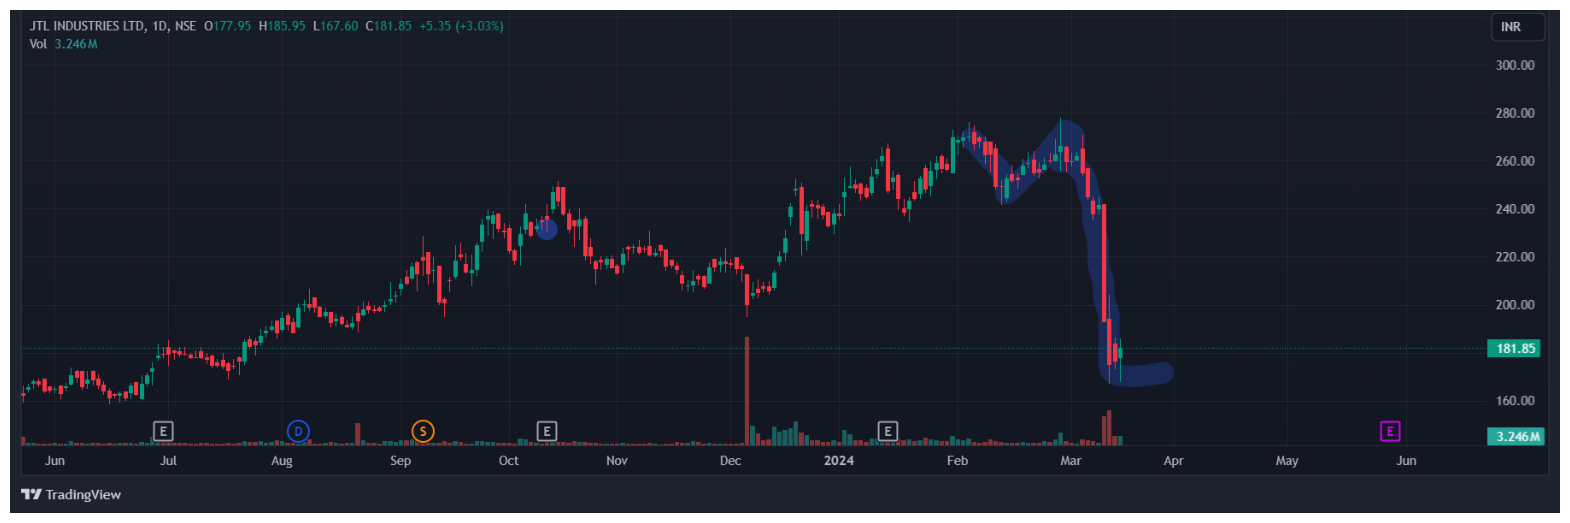

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path = '/content/JTL.png'


# Load the image
img = mpimg.imread(image_path)

# Display the image
plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()